# Analysis

1) The further a city is away from 0 degrees latitude (aka further away from the equator), the colder the average temperature will be.

2) There appear to be more cities in the northern hemisphere than the southern hemisphere.

3) Higher latitudes may have higher wind speeds.

# WeatherPy Homework

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

1) Temperature (F) vs. Latitude;
2) Humidity (%) vs. Latitude;
3) Cloudiness (%) vs. Latitude;
4) Wind Speed (mph) vs. Latitude.

Your final notebook must:

1) Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
2) Perform a weather check on each of the cities using a series of successive API calls.
3) Include a print log of each city as it's being processed with the city number and city name.
4) Save both a CSV of all data retrieved and png images for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate cities list

In [2]:
# List for holding lat_lngs and cities
lat_lons = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [4]:
print(cities)

['guerrero negro', 'seoul', 'iqaluit', 'kodiak', 'villarrica', 'zabol', 'vaini', 'ushuaia', 'punta arenas', 'hobart', 'bengbu', 'port alfred', 'east london', 'luderitz', 'nikolskoye', 'erenhot', 'ribeira grande', 'cam pha', 'georgetown', 'chokurdakh', 'barentsburg', 'niono', 'tautira', 'thompson', 'bridgetown', 'tonantins', 'mar del plata', 'sao filipe', 'hamilton', 'sitka', 'katsuura', 'atuona', 'emba', 'zadar', 'viedma', 'mataura', 'hasaki', 'mys shmidta', 'praia', 'aklavik', 'imeni babushkina', 'vegueta', 'albany', 'palabuhanratu', 'saint george', 'torbay', 'kovernino', 'stawell', 'mughal sarai', 'vasylivka', 'mount isa', 'altay', 'geraldton', 'busselton', 'grand river south east', 'jamestown', 'rio grande', 'russell', 'banjar', 'haines junction', 'rikitea', 'cherskiy', 'taolanaro', 'bengkulu', 'kapaa', 'bethel', 'billings', 'tselinnoye', 'khonuu', 'zhigansk', 'barrow', 'nizhneyansk', 'bilibino', 'sao jose da coroa grande', 'inuvik', 'westport', 'carupano', 'bambous virieux', 'herma

### Perform API calls

In [8]:
# OpenWeatherMap API Key
from config import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Convert list of cities to a dataframe
df = pd.DataFrame(cities)

# Add blank columns dataframe for the additional fields
df["Latitude"] = ""
df["Longitude"] = ""
df["Temperature"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df.columns = ['City', 'Latitude', 'Longitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,guerrero negro,,,,,,
1,seoul,,,,,,
2,iqaluit,,,,,,
3,kodiak,,,,,,
4,villarrica,,,,,,


In [12]:
# Set up for loop to gather info on all cities and a row counter
row_counter = 0
for index, row in df.iterrows():
    query_url = url + "&q=" + row['City'].replace(" ","+")
    print("Now retieving city # " + str(row_counter))
    print(query_url)
    row_counter = row_counter + 1
    
    # Run requests
    city_weather = requests.get(query_url).json()

    print(row["Latitude"],row["Longitude"])
    print(city_weather.keys())
    
    # Append the weather data to the appropriate column(s)
    #Use try/except to skip any cities with errors.
    try:
        lat = city_weather['coord']['lat']
        lon = city_weather['coord']['lon']
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        df.set_value(index, "Latitude", lat)
        df.set_value(index, "Longitude", lon)
        df.set_value(index, "Temperature", temperature)
        df.set_value(index,"Humidity", humidity)
        df.set_value(index,"Cloudiness", cloudiness)
        df.set_value(index,"Wind Speed", wind_speed)
    
    except:
        print("ERROR: skipping city")

Now retieving city # 0
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=guerrero+negro
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=seoul


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=iqaluit
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kodiak
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=villarrica
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 5
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=zabol


 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 36
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hasaki
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 37
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mys+shmidta
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 38
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=praia
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 39
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aklavik
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', '

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 71
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nizhneyansk
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 72
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilibino
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 73
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao+jose+da+coroa+grande
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 74
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=inuvik
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', '

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 106
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cuamba
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 107
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=samusu
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 108
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sarakhs
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 109
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=zelenoborskiy
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys',

 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 141
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=beterou
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 142
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cholan
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 143
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ferrol
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 144
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=korla
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 145
http://api.openweathermap.org/data/2.5/weather?units=Imper

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 177
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=biograd+na+moru
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 178
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sambava
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 179
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=touros
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 180
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sentyabrskiy


 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 212
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=iberia
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 213
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lata
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 214
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=albion
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 215
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=karratha
 
dict_keys(['coord', 'weather

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 246
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rabo+de+peixe
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 247
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=leh
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 248
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kawalu
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 249
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=talnakh
 
dict_keys(['coord', 'weather', 

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 281
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gold+coast
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 282
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=san+juan+de+la+maguana
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 283
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=norman+wells
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 284
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 316
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ucluelet
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 317
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tommot
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 318
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mikhaylovskoye
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 319
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kurchum
 
dict_keys(['coord', 'weat

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 351
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=manicore
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 352
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=poum
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 353
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=maniitsoq
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 354
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fontanka
 
dict_keys(['coord

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 385
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=acopiara
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 386
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bouna
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 387
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=huilong
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 388
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bathsheba
 
dict_keys(['coord', 'we

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 420
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=surovikino
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 421
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cururupu
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 422
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-pierre
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 423
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=namibe
 
di

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 455
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=newport
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 456
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=xinan
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 457
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto+madryn
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 458
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=us

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 489
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port+augusta
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 490
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=utiroa
 
dict_keys(['cod', 'message'])
ERROR: skipping city
Now retieving city # 491
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kjollefjord
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 492
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=belmonte
 
dict_keys(['coord', 'weather', 'base', 'main

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 523
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=merauke
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 524
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=laguna
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 525
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sigli
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 526
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=assen
 
dict_keys(['coord', 'weather', 'base'

 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 557
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=shimoda
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 558
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mezen
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 559
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=batticaloa
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 560
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chagda
 
dict_keys(['cod', 'messa

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 592
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=carauari
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 593
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tabuk
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 594
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=simplicio+mendes
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 595
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=oranjemund
 
dict_keys([

 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 628
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=soligalich
 
dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 629
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sistranda
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 630
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hervey+bay
 
dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])
Now retieving city # 631
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bowen
 
dict

In [13]:
# Set up dataframe for graphs
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Temperature"] = pd.to_numeric(df["Temperature"], errors='coerce')
df["Humidity"] = pd.to_numeric(df["Humidity"], errors='coerce')
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"], errors='coerce')
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"], errors='coerce')

## Temperature (F) vs. Latitude

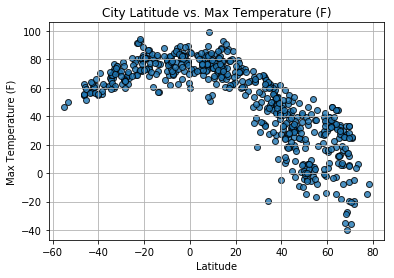

In [15]:
## Build scatter plot for latitude vs. temperature
plt.scatter(df['Latitude'],
            df['Temperature'],
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Humidity (%) vs. Latitude

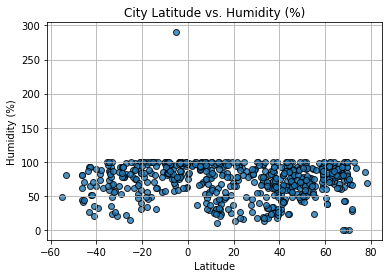

In [17]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(df['Latitude'], 
            df['Humidity'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Cloudiness (%) vs. Latitude

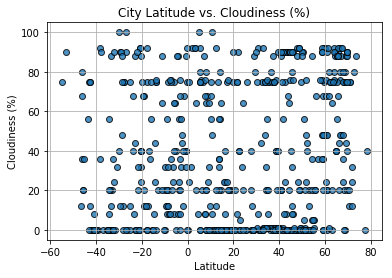

In [18]:
# Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(df['Latitude'], 
            df['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Wind Speed (mph) vs. Latitude

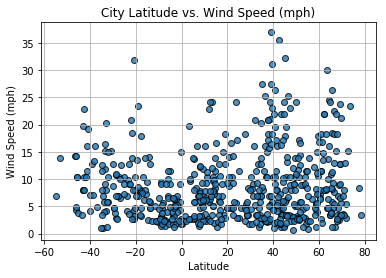

In [20]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(df['Latitude'], 
            df['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()